In [1]:
# import libraries

# for data manupulation
import pandas as pd

# fro plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define variables
experiment = "experiment_2-BS6"

model_names = {"random_forest", "knn", "svm"}
target = "log_precision"

if experiment == "experiment_1":
    
    suites = ['cec2013', 'cec2014', 'cec2015', 'cec2017', 'bbob']
    algorithms = ["DE", "RealSpacePSO", "CMA"]
    budget = 100000
    index_col = ["f_id", "i_id"]


elif experiment == "experiment_2":

    suites = ["BS1", "BS2", "BS3", "BS4", "BS5"]
    budget = 10000
    algorithms = ["diagCMA", "DE", "PSO"]
    index_col = ["f0", "f1", "alpha"]
    
elif experiment == "experiment_2-BS6":

    suites = ["BS1", "BS2", "BS3", "BS4", "BS5", "BS6"]
    budget = 10000
    algorithms = ["diagCMA", "DE", "PSO"]
    index_col = ["f0", "f1", "alpha"]

In [3]:
# define directories
results_folder = f"Results/{experiment}"
results_folder

'Results/experiment_2-BS6'

# Average perfromance

In [4]:
# load model perfromance
model_performance = pd.read_csv(f"{results_folder}/performance.csv")
model_performance.head()

,target,model_name,algorithm_name,train_suite,test_suite,mae_train,mdae_train,r2_train,mae_test,mdae_test,r2_test
0,log_precision,random_forest,diagCMA,BS1,BS2,0.095831,0.06575,0.904696,0.151179,0.089669,0.750426
1,log_precision,random_forest,diagCMA,BS1,BS3,0.095831,0.06575,0.904696,0.190729,0.112051,0.611115
2,log_precision,random_forest,diagCMA,BS1,BS4,0.095831,0.06575,0.904696,0.190626,0.117765,0.691892
3,log_precision,random_forest,diagCMA,BS1,BS5,0.095831,0.06575,0.904696,0.200708,0.110893,0.637074
4,log_precision,random_forest,diagCMA,BS1,BS6,0.095831,0.06575,0.904696,0.367093,0.318307,-0.009937


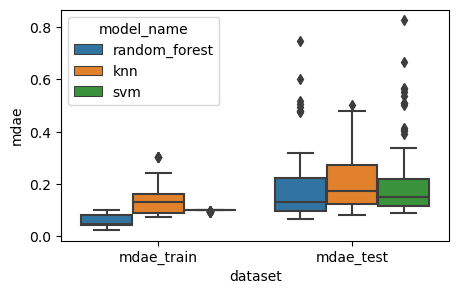

In [5]:
# Plot 
df_plot = pd.melt(model_performance[["model_name", "mdae_train", "mdae_test"]], id_vars="model_name", value_vars=["mdae_train", "mdae_test"], var_name="dataset", value_name="mdae")

# Create the boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x="dataset", y="mdae", hue="model_name", data=df_plot)

# Display the plot
plt.show()

## Heatmaps

model_name: random_forest
algorithm_name: diagCMA


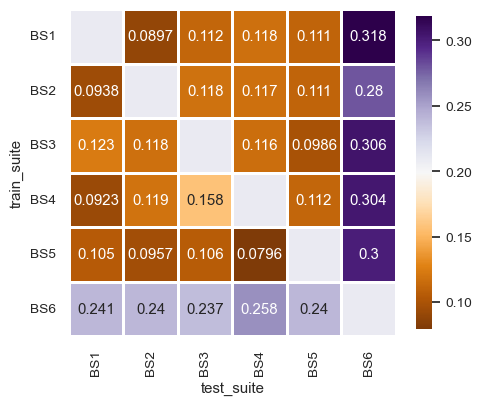

algorithm_name: DE


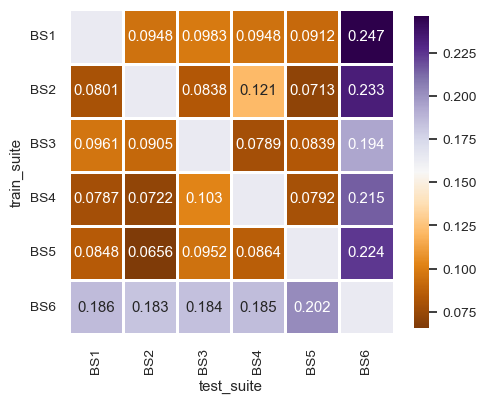

algorithm_name: PSO


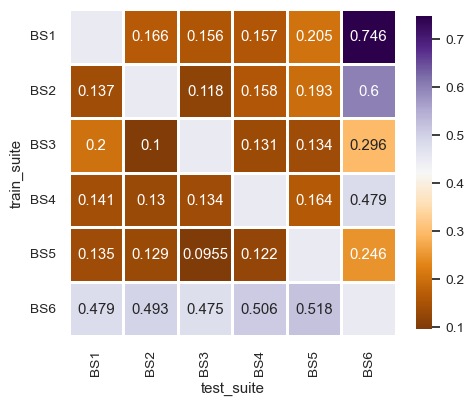

In [8]:
title = ""

for model_name in ["random_forest"]:
    print(f"model_name: {model_name}")
    for algorithm_name in algorithms: 
        print(f"algorithm_name: {algorithm_name}")
        
        # set up figure
        sns.set()
        sns.set(font_scale=0.9)
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        model_performance_temp = model_performance[(model_performance["model_name"]==model_name)&(model_performance["algorithm_name"] == algorithm_name)]             
        model_performance_temp = model_performance_temp.pivot_table(index='train_suite', columns="test_suite", values="mdae_test")

        # plot heatmap
        sns.heatmap(model_performance_temp, ax=axs
                    , annot=True
                    , cmap="PuOr"
                    , linewidths=2
                    , square=True
                    , fmt='.3g'
                    , vmin = model_performance_temp.min().min()
                    , vmax = model_performance_temp.max().max()
                    , cbar_kws={"shrink": 0.7})

        axs.xaxis.set_tick_params(rotation=90)
        axs.yaxis.set_tick_params(rotation=0)
#             axs.set_title(f"{model_name}_{algorithm_name}_{target}")
        plt.tight_layout()

        # save    
        model_performance_temp.columns.name  = None
        model_performance_temp.reset_index().to_csv(f"{results_folder}/performance_model={model_name}_algorithm={algorithm_name}.csv"
                                                   , index=False)
        plt.savefig(f"{results_folder}/performance_model={model_name}_algorithm={algorithm_name}.png", dpi=300)
        plt.show()
        plt.close()

In [7]:
# sns.set(style="dark")
# flights = sns.load_dataset("flights")
# g = sns.relplot(x="year", y="month",
#                 hue="passengers", size="passengers",
#                 hue_norm=(100, 600), size_norm=(100, 600),
#                 palette="mako_r", sizes=(40, 400),
#                 marker="s", linewidth=0, legend=False,
#                 aspect=1.25, data=flights)
# g.ax.invert_yaxis()
# ghost = g.ax.scatter([], [], c=[], vmin=100, vmax=600, cmap="mako_r")
# g.fig.colorbar(ghost)

## Spider plot

In [6]:
# import plotly.express as px
# df = px.data.wind()
# print(df )

# for i, target in enumerate(["precision", "log_precision"]): 
#     print(f"target: {target}")
    
#     for model_name in ["random_forest", "knn", "svm"]:
#         print(f"model_name: {model_name}")

#         for algorithm_name in ['CMA', 'DE', 'RealSpacePSO']: 
#             print(f"algorithm_name: {algorithm_name}")

#             model_performance_temp = model_performance[(model_performance["model_name"]==model_name)&(model_performance["target"] == target)&(model_performance["algorithm_name"] == algorithm_name)] 
#             print(model_performance_temp)

#             fig = px.line_polar(model_performance_temp, r="mdae_test", theta="test_suite", color="train_suite", line_close=True,
#                                 color_discrete_sequence=px.colors.sequential.Plasma_r,)
#             fig.show()
# #             fig.write_image(f"C:/Users/anani/Downloads/Projects 2021_22/generalisability_index/Results/performance_{model_name}_{algorithm_name}.png")

# Perfromance per function

In [7]:
def plot_performance_per_function(df, x, y, logscale, figsize, title, save_path, **kwargs):
    """
    Function to plot algorithm portfolio performance per instance.
    """
    # Set up the matplotlib figure
    sns.set()
    sns.set_theme(style='whitegrid', font_scale=1)

    legend = False
    df['f_id'] = df['f_id'].astype(str)
    
    fig, axs = plt.subplots(1, 1, figsize=figsize)

    g = sns.scatterplot(data=df, x=x, y=y, ax=axs, legend=True, s=50, **kwargs)

    # enhance plot
    if logscale:
        g.set(yscale='log')

    plt.gca().yaxis.grid(False)
    plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.3, title='')
    
    fig.suptitle(title)
    
    # save
    plt.tight_layout()
    plt.savefig(f"{save_path}/performance_per_function_{title}.png")
    
    plt.show()
    plt.close    

In [8]:
# # laod model perfromance per function
# model_performance_function = pd.read_csv(f"C:/Users/anani/Downloads/Projects 2021_22/generalisability_index/Results/performance_per_function.csv")
# model_performance_function.head()

In [9]:
# logscales = [True, False]
# for i, target in enumerate(["precision", "log_precision"]):
#     for test_suite in ['bbob', 'cec2013', 'cec2014', 'cec2015', 'cec2017']:
        
#         for model_name in ["random_forest", "knn", "svm"]:
#             print(f"model_name: {model_name}")

#             for algorithm_name in ['CMA', 'DE', 'RealSpacePSO']: 
#                 print(f"algorithm_name: {algorithm_name}")

#                 model_performance_function_temp = model_performance_function[(model_performance_function["model_name"]==model_name)&(model_performance_function["target"] == target)&(model_performance_function["algorithm_name"] == algorithm_name)&(model_performance_function["test_suite"] == test_suite)]
#                 plot_performance_per_function(df=model_performance_function_temp, x="f_id", y="mae", logscale=logscales[i], figsize=(13, 5)
#                                               , title=f"{model_name}_{algorithm_name}_test_suite={test_suite}"
#                                               , save_path=f"C:/Users/anani/Downloads/Projects 2021_22/generalisability_index/Results/", hue="train_suite",  style="train_suite")